# K-Means; Some background
Consider the set
 $D = \{ {\bf x}_{1}, {\bf x}_{2}, \cdots, {\bf x}_{N}) \} $, where each ${\bf x}_i \in \mathbb{R}^d$ is a $d$ dimensional feature vector. The goal is to find $K$ clusters that with cluster centers $ \{ {\bf x}^{*c}_{1}, {\bf x}^{*c}_{2}, \cdots, {\bf x}^{*c}_{K}\} $ that can represent this data set so that the following loss function is minimized
$$
J=\frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_j^c\|^2
$$

The cluster centers are then found using the following
 $$
 \begin{align}
 \{ {\bf x}^{*c}_{1}, {\bf x}^{*c}_{2}, \cdots, {\bf x}^{*c}_{K}\}& = \underset{\{ {\bf x}^c_{1}, {\bf x}^c_{2}, \cdots, {\bf x}^c_{K}\}}{argmin} ~~  \frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_j^c\|^2 \\
 \end{align}
 $$   

 Unfortunately this loss function is not convex so depending your initial condition and your optimization strategy, the minimum you find might be a local minima. Knowing this fact, in most cases, you solve this optimization problem as follows:


1.   Randomly initialize cluster centers  $ \{ {\bf x}^{c}_{1}, {\bf x}^{c}_{2}, \cdots, {\bf x}^{c}_{K}\} $ (typically, you set them to any $K$ distinct feature vectors from $D$)
2.  Find members of cluster sets (for each ${\bf x}_{i}$ select membership to the cluster of the closest ${\bf x}^{*c}_{j}$)
$$
S_{j^*} = \{ {\bf x}_i \in D ~|~ j^* = \underset{j}{argmin} \| {\bf x}_i - {\bf x}_j^c\| \} ~~~ j^*=1, \cdots, K
$$
1.   Find the new cluster centers (just calculate the average of all members of each cluster):
$$
{\bf x}^c_{j^*} \leftarrow  \frac{1} {|S_{j*}|}\sum_{\forall {x}_i\in S_{j*} }{\bf x}_i ~~~~~~~~ j^*= 1, \cdots, K
$$
where $|S_{j*}|$ is the cardinality of $S_{j*}$ ( the number of elements of $S_{j*}$).
2.   Calculate the cost function, now with the new cluster memberships:
$$
J_{new}=\frac{1}{N} \sum_{i=1}^N \underset{j}{min} \| {\bf x}_i - {\bf x}_{j^*}^c\|^2
$$
If the cluster membership does not change from teh last iteration, then stop.  Otherwise go to step 2.



***
***

#Problem 1 [2 points]
Write Python code that implements the K-Means algorithm, as given above, to classify the data.
*   Use $K=5$
*   To reduce the sensitivity to initial conditions, your code should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the final cost, $J$


#Problem 2 [3 points]
Repeat what you did in Problem 1, except this time, vary the number of clusters.
*   Use $K=2$, $K=4$, and $K=10$.   
*   To reduce the sensitivity to initial conditions, your code for each case should choose several (10) random initial conditions and then select the one that results in minimum total error.
*   Provide the minimum cost, $J_K$, for $K=2, 4, 10$

  Use the data that is generated in the following code to test your code.

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2],
     [-1.5 ,  2],
     [-3,  1.8],
     [-3,  3],
     [-3,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [ ]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=17)

Text(0, 0.5, '$x_2$')

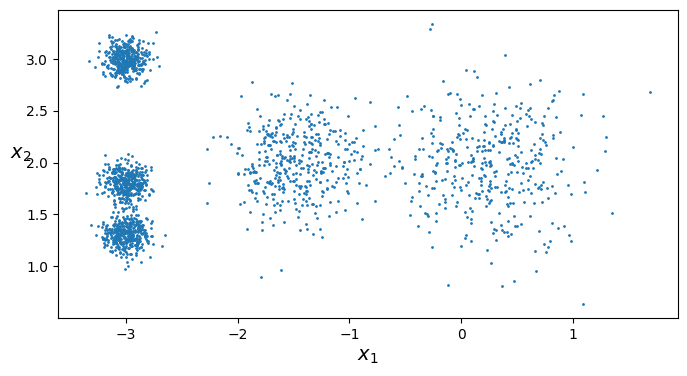

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1],  s=1)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)


Final Total Error (Cost J): 0.11308854322559052


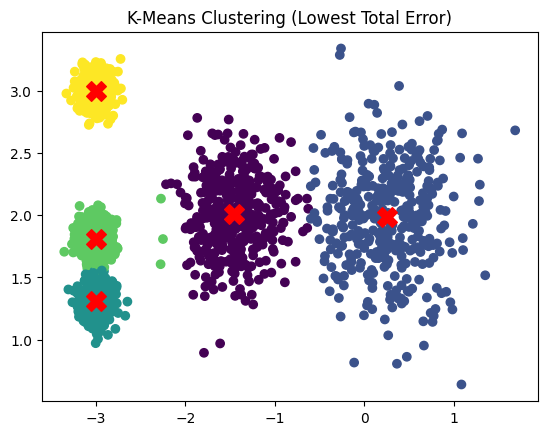

In [ ]:
# Problem 1, k=5
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

def k_means(X, k, n_init=10, max_iters=100, tol=1e-4):
    best_centroids = None
    best_labels = None
    min_error = np.inf

    for _ in range(n_init):
        # Randomly initialize centroids
        centroids = X[np.random.choice(len(X), k, replace=False)]

        for _ in range(max_iters):
            # Assign each data point to the nearest centroid
            labels = np.argmin(np.linalg.norm(X - centroids[:, np.newaxis], axis=2), axis=0)


            # Update centroids
            new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

            # Check for convergence
            if np.linalg.norm(new_centroids - centroids) < tol:
                break

            centroids = new_centroids

        # Calculate total error (sum of squared distances)
        error = np.sum((X - centroids[labels]) ** 2) / len(X)

        # Update best centroids if this run has lower error
        if error < min_error:
            min_error = error
            best_centroids = centroids
            best_labels = labels

    return best_centroids, best_labels, min_error

# Run k-means algorithm with multiple initial conditions
k = 5
n_init = 10
centroids, labels, min_error = k_means(X, k, n_init)
print("Final Total Error (Cost J):", min_error)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering (Lowest Total Error)')
plt.show()

Final Total Error (Cost J): 0.68672274747668


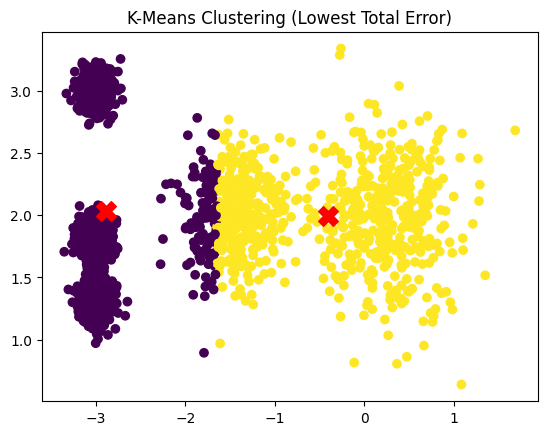

In [ ]:
# problem 2
# k=2
k = 2
centroids, labels, min_error = k_means(X, k, n_init)
print("Final Total Error (Cost J):", min_error)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering (Lowest Total Error)')
plt.show()

Final Total Error (Cost J): 0.13773435631893724


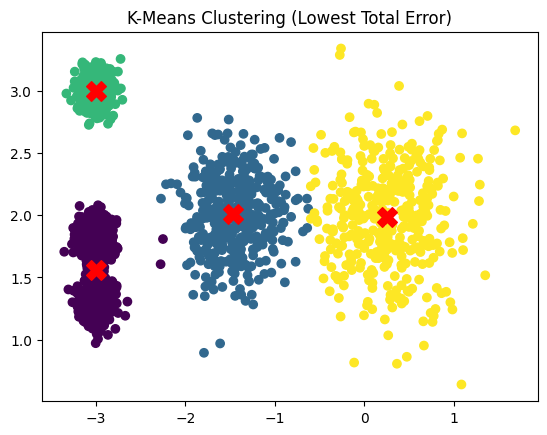

In [ ]:
# k=4
k = 4
centroids, labels, min_error = k_means(X, k, n_init)
print("Final Total Error (Cost J):", min_error)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering (Lowest Total Error)')
plt.show()

Final Total Error (Cost J): 0.054766813527634114


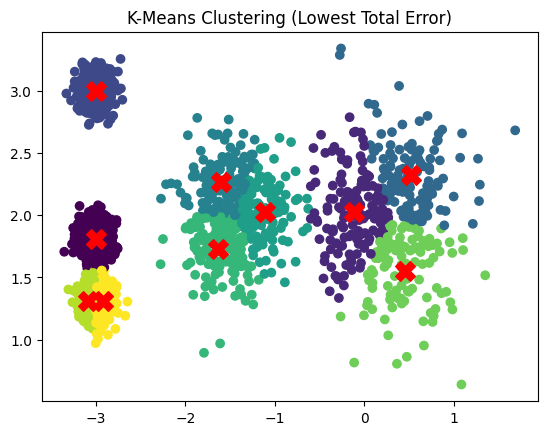

In [ ]:
# k=10
k = 10
centroids, labels, min_error = k_means(X, k, n_init)
print("Final Total Error (Cost J):", min_error)
# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering (Lowest Total Error)')
plt.show()

In order to verify the cost, I ran the different k values with sklearn library.

Final Cost (J): 0.11308854322559062


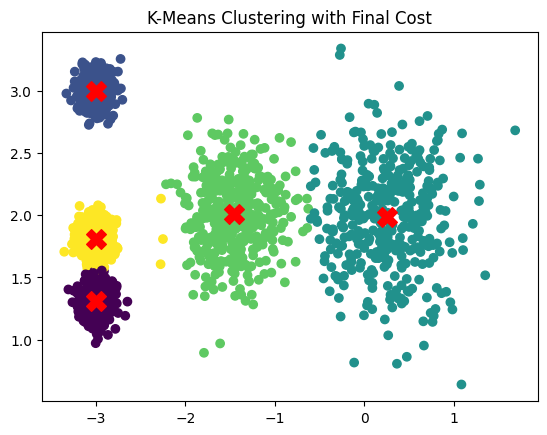

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init=10).fit(X)
final_cost = kmeans.inertia_ / len(X)
# Get cluster labels, centroids, and final cost (inertia)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Print the final cost
print(f"Final Cost (J): {final_cost}")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering with Final Cost')
plt.show()

Final Cost (J): 0.6868545952215206


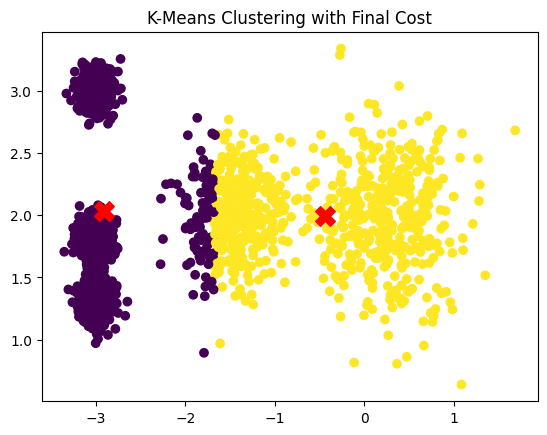

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10).fit(X)
final_cost = kmeans.inertia_ / len(X)
# Get cluster labels, centroids, and final cost (inertia)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Print the final cost
print(f"Final Cost (J): {final_cost}")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering with Final Cost')
plt.show()

Final Cost (J): 0.13773634700340814


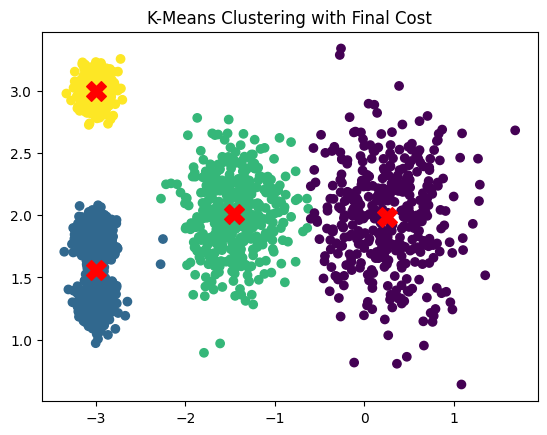

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10).fit(X)
final_cost = kmeans.inertia_ / len(X)
# Get cluster labels, centroids, and final cost (inertia)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Print the final cost
print(f"Final Cost (J): {final_cost}")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering with Final Cost')
plt.show()

Final Cost (J): 0.050437874606298824


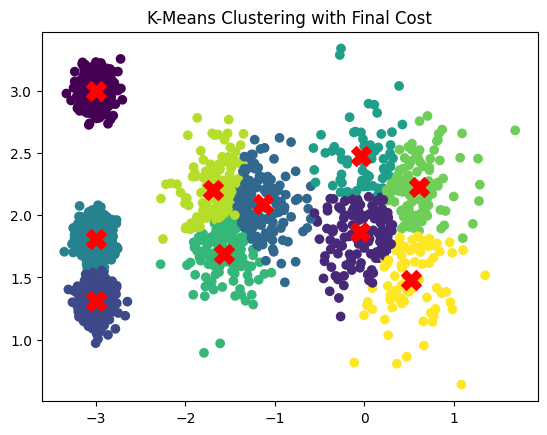

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10).fit(X)
final_cost = kmeans.inertia_ / len(X)
# Get cluster labels, centroids, and final cost (inertia)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Print the final cost
print(f"Final Cost (J): {final_cost}")

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red')
plt.title('K-Means Clustering with Final Cost')
plt.show()